# Import package

In [2]:
import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiaye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Facebook

In [3]:
# Facepager collected facebook post and comment
df_facepager = pd.read_csv('D:/Downloads/MDSProject/Dataset/Facepager_data.csv')
df_facepager.shape

(51884, 3)

In [4]:
df_facepager.head()

,query_type,message,created_time
0,Facebook:/<page-id>/posts,Keep the party going! 🎉 Final week to get your...,2023-04-29T12:21:49+0000
1,Facebook:/<post-id>/comments,The amount of chillis given by pizzahut for 2 ...,2023-04-29T13:26:05+0000
2,Facebook:/<post-id>/comments,Cutie piessss ❤️,2023-04-29T14:28:13+0000
3,Facebook:/<post-id>/comments,so comel la these 2 kids 🥰,2023-04-29T12:55:17+0000
4,Facebook:/<post-id>/comments,Can McDonald pls take action on this Google Re...,2023-04-30T06:36:10+0000


In [5]:
df_facepager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51884 entries, 0 to 51883
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   query_type    51884 non-null  object
 1   message       51884 non-null  object
 2   created_time  51884 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [4]:
df_facepager["source"]= "facebook"

In [5]:
df_facepager.rename(columns={"message" : "text"}, inplace= True)

In [6]:
df_facepager['query_type'].value_counts()

Facebook:/<post-id>/comments    48784
Facebook:/<page-id>/posts        3100
Name: query_type, dtype: int64

In [7]:
def check_word(row):
    if 'posts' in row:
        return "post"
    else:
        return "comment"
# Apply the function to the 'Text' column
df_facepager['query_type'] = df_facepager['query_type'].apply(check_word)

df_facepager.head()

,query_type,text,created_time,source
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29T12:21:49+0000,facebook
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29T13:26:05+0000,facebook
2,comment,Cutie piessss ❤️,2023-04-29T14:28:13+0000,facebook
3,comment,so comel la these 2 kids 🥰,2023-04-29T12:55:17+0000,facebook
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30T06:36:10+0000,facebook


In [8]:
df_facepager['text'].duplicated().value_counts()

False    51884
Name: text, dtype: int64

In [9]:
df_facepager.isna().sum()

query_type      0
text            0
created_time    0
source          0
dtype: int64

In [10]:
df_facepager.shape

(51884, 4)

## Twitter

In [11]:
# Tweepy extracted tweet
df_tweet = pd.read_csv('D:/Downloads/MDSProject/Dataset/tweet.csv')
df_tweet.shape

(2752, 3)

In [12]:
df_tweet.head()

,tweet_id,created_at,text
0,1655919663749140481,2023-05-09 12:56:27+00:00,@McDMalaysia NAK
1,1655919583000408072,2023-05-09 12:56:08+00:00,@McDMalaysia yessssss
2,1655919175142113286,2023-05-09 12:54:31+00:00,@PendetaSang @McDMalaysia Kalau ikut hukum asa...
3,1655918498252738560,2023-05-09 12:51:50+00:00,@echelon_crimson @McDMalaysia Pedas yg tak mem...
4,1655918445010223104,2023-05-09 12:51:37+00:00,@McDMalaysia Yessssss &amp; please bring along...


In [13]:
df_tweet["source"]= "twitter"

In [14]:
df_tweet.rename(columns={"created_at" : "created_time"}, inplace= True)

In [15]:
df_tweet = df_tweet [['text', 'source', 'created_time']]

In [16]:
df_tweet['text'].duplicated().value_counts()

True     1561
False    1191
Name: text, dtype: int64

In [17]:
df_tweet.drop_duplicates(subset=['text'], inplace=True)

In [18]:
df_tweet.isna().sum()

text            0
source          0
created_time    0
dtype: int64

In [19]:
df_tweet.shape

(1191, 3)

## Previous research dataset

In [20]:
# Previous project dataset
df_pp = pd.read_csv('D:/Downloads/MDSProject/Dataset/food/food/food_tweets.csv')
df_pp.shape

C:\Users\jiaye\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(45322, 16)

In [21]:
df_pp.head()

,Unnamed: 0,Unnamed: 0.1,Date,user_name,user_friends,user_location,text,cleanText,Sentiment Score,Subjectivity,Textblob_sentiment,Negative Score,Positive Score,Neutral Score,Compound Score,Vader Sentiment
0,0.0,0,2022-07-04 23:59:53+00:00,KaliHecate,6968,NaN,@TheRealLCB24 You know they’re about to take h...,thereallcb know take burger king,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
1,1.0,1,2022-07-04 23:59:46+00:00,Gina33498782,933,"Colorado, USA",@TwoMartinisPls I’m sure Burger King was open....,twomartinispls sure burger king open quick pit...,0.008333,0.697222,Positive,0.375,0.139,0.485,-0.5984,Negative
2,2.0,2,2022-07-04 23:59:43+00:00,jladams08030,962,California,@stevesilberman As anyone could have correctly...,stevesilberman anyone could correctly guessed ...,0.050000,0.350000,Positive,0.000,0.000,1.000,0.0000,Neutral
3,3.0,3,2022-07-04 23:59:43+00:00,adnan_pajic,418,"Saint Louis, MO",@ZekeJMiller @Phil_Mattingly Did they take him...,zekejmiller phil_mattingly take burger king mc...,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
4,4.0,4,2022-07-04 23:59:40+00:00,HessNesbit,2085,"Washington, DC","@AshIsHereForIt ""You want lobster, huh? I'm th...",ashishereforit want lobster huh thinking burge...,0.000000,0.000000,Neutral,0.000,0.178,0.822,0.0772,Positive


In [22]:
df_pp["source"]= "previous project"

In [23]:
# Number of different sentiment label
print(len(df_pp[df_pp['Textblob_sentiment']!= df_pp['Vader Sentiment']]))

17546


In [24]:
# Percentage of different sentiment label
print(len(df_pp[df_pp['Textblob_sentiment']!= df_pp['Vader Sentiment']])/len(df_pp)*100)

38.7140902872777


In [25]:
df_pp = df_pp [['text', 'source', 'Vader Sentiment']]

In [26]:
df_pp.rename(columns={"Vader Sentiment" : "sentiment"}, inplace= True)

In [27]:
df_pp['text'].duplicated().value_counts()

False    45055
True       267
Name: text, dtype: int64

In [28]:
df_pp.drop_duplicates(subset=['text'], inplace=True)

In [29]:
df_pp['text'].isna().sum()

1

In [30]:
df_pp.dropna(inplace = True)

In [31]:
df_pp.shape

(45054, 3)

## Open AI generated text

In [32]:
# Open AI generated text
df_ai = pd.read_csv('D:/Downloads/MDSProject/Dataset/OpenAI_generated_text.csv')
df_ai.shape

(47, 2)

In [33]:
df_ai.head()

,text,sentiment
0,McDonald's Malaysia is one of the most popular...,Positive
1,KFC Malaysia has been a staple in the fast foo...,Positive
2,With a variety of fast food outlets in Malaysi...,Neutral
3,McDonald's Malaysia has become a go-to destina...,Positive
4,KFC Malaysia has been providing delicious frie...,Positive


In [34]:
df_ai["source"]= "openai"

In [35]:
df_ai['text'].duplicated().sum()

0

In [36]:
df_ai.isna().sum()

text         0
sentiment    0
source       0
dtype: int64

# Merge dataset

In [37]:
df_merge = pd.concat([df_facepager,df_tweet,df_pp,df_ai])
df_merge.head()

,query_type,text,created_time,source,sentiment
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29T12:21:49+0000,facebook,NaN
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29T13:26:05+0000,facebook,NaN
2,comment,Cutie piessss ❤️,2023-04-29T14:28:13+0000,facebook,NaN
3,comment,so comel la these 2 kids 🥰,2023-04-29T12:55:17+0000,facebook,NaN
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30T06:36:10+0000,facebook,NaN


# EDA

In [38]:
# dataframe shape
df_merge.shape

(98176, 5)

In [39]:
df_merge['text'].duplicated().value_counts()

False    98171
True         5
Name: text, dtype: int64

In [40]:
df_merge[df_merge['text'].duplicated() == True]

,query_type,text,created_time,source,sentiment
932,NaN,Burger king,NaN,previous project,Neutral
6932,NaN,text,NaN,previous project,Neutral
8369,NaN,Burger King,NaN,previous project,Neutral
15009,NaN,I love KFC,NaN,previous project,Positive
37334,NaN,Pizza Hut,NaN,previous project,Neutral


In [41]:
df_merge.drop_duplicates(subset=['text'], inplace=True)

In [42]:
df_merge.isna().sum()

query_type      46287
text                0
created_time    45096
source              0
sentiment       53075
dtype: int64

In [43]:
df_merge.shape

(98171, 5)

In [44]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98171 entries, 0 to 46
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   query_type    51884 non-null  object
 1   text          98171 non-null  object
 2   created_time  53075 non-null  object
 3   source        98171 non-null  object
 4   sentiment     45096 non-null  object
dtypes: object(5)
memory usage: 4.5+ MB


In [45]:
# Convert string to datetime
df_merge['created_time'] = pd.to_datetime(df_merge['created_time'])

In [46]:
# Proportion of each sources
df_merge['source'].value_counts(normalize=True)

facebook            0.528506
previous project    0.458883
twitter             0.012132
openai              0.000479
Name: source, dtype: float64

In [47]:
# Number of each sources
df_merge['source'].value_counts()

facebook            51884
previous project    45049
twitter              1191
openai                 47
Name: source, dtype: int64

In [48]:
df_merge['sentiment'].value_counts()

Neutral     18544
Positive    15145
Negative    11407
Name: sentiment, dtype: int64

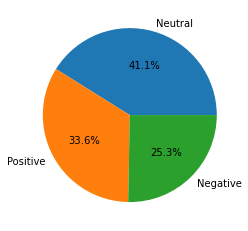

In [49]:
# Percentage of sentiment
plt.pie(df_merge['sentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%.1f%%')
plt.show()

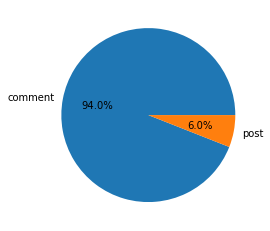

In [50]:
# Percentage of query type for facebook
plt.pie(df_merge['query_type'].value_counts(),labels=['comment','post'],autopct='%.1f%%')
plt.show()

In [51]:
# Group data based on month and year
#grouped = df_merge.groupby('created_time')['text'].count()
grouped = df_merge.groupby(pd.Grouper(key='created_time', freq='M')).size()
grouped

created_time
2022-06-30 00:00:00+00:00     1973
2022-07-31 00:00:00+00:00     3261
2022-08-31 00:00:00+00:00     3456
2022-09-30 00:00:00+00:00     3841
2022-10-31 00:00:00+00:00    10380
2022-11-30 00:00:00+00:00     6729
2022-12-31 00:00:00+00:00     7484
2023-01-31 00:00:00+00:00     4752
2023-02-28 00:00:00+00:00     2841
2023-03-31 00:00:00+00:00     4949
2023-04-30 00:00:00+00:00     2076
2023-05-31 00:00:00+00:00     1333
dtype: int64

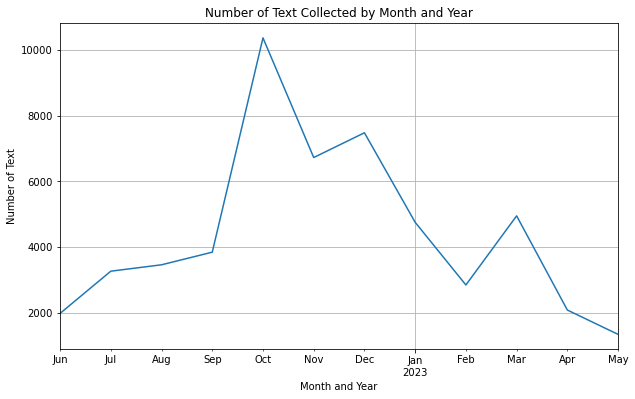

In [52]:
# Plot line chart
grouped.plot(kind='line', figsize=(10, 6))

plt.xlabel('Month and Year')
plt.ylabel('Number of Text')
plt.title('Number of Text Collected by Month and Year')
plt.grid(True)
plt.show()

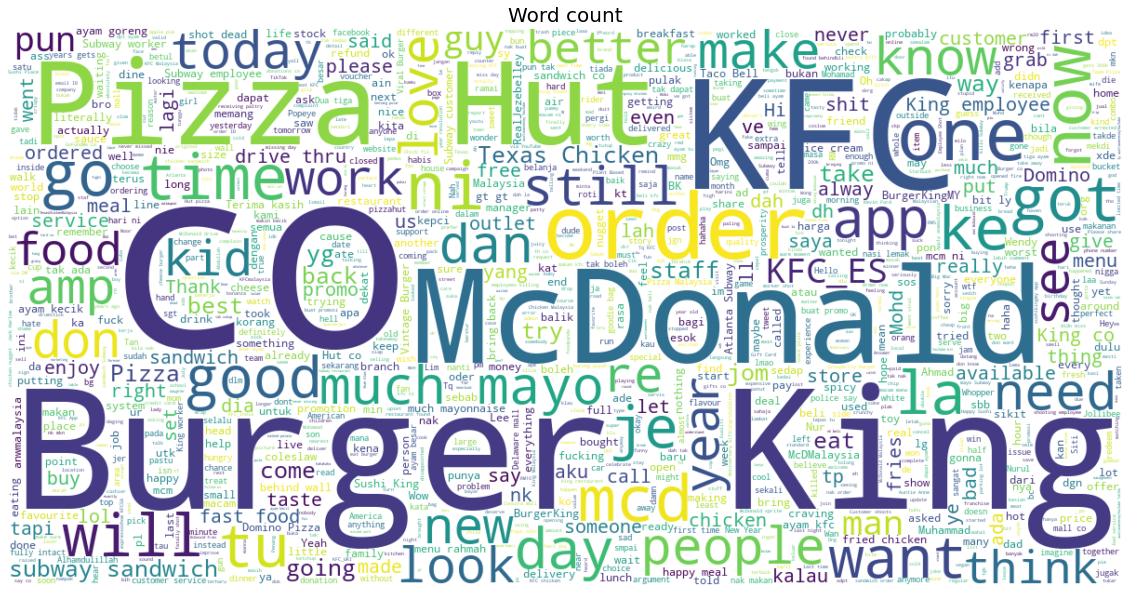

In [53]:
#review = df_merge['text']
#review = df_merge['text'].astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
#review_string = ' '.join(review)
#split = review_string.split()
#cleaned_word = " ".join([string for string in positive_split if 'br' not in string])

review = df_merge['text'].apply(lambda x: str(x))

# remove non-word characters using a regular expression
pattern = r'\w+'
review_string = ' '.join(re.findall(pattern, ' '.join(review)))
cleaned_word = " ".join([word for word in review_string.split()
                            if 'http' not in word
                                and len(word) != 1
                            ])

#plot the words
plt.figure(figsize=(20,20))
wc = WordCloud(stopwords=STOPWORDS, max_words=1200,width = 1200, height=600, background_color= "white").generate(cleaned_word)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count",fontsize=20)
plt.show()

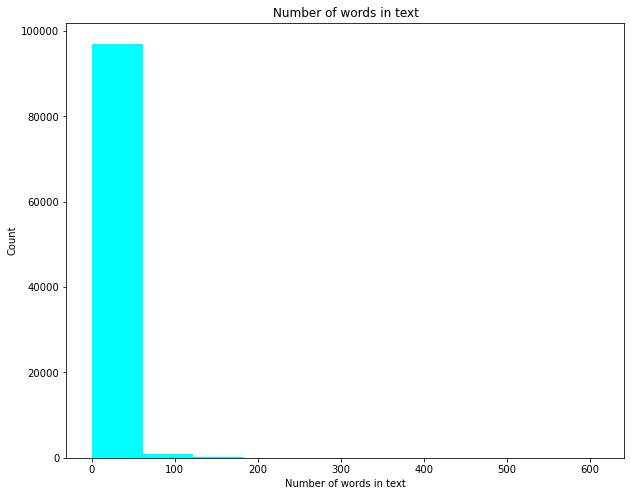

In [54]:
# split each text into a list of words and get the length of each list
split = review.str.split()
text_len = split.map(lambda x: len(x))

fig,ax =plt.subplots(figsize=(10,8))
ax.hist(text_len,color='cyan')
ax.set_title("Number of words in text")
ax.set_xlabel("Number of words in text")
ax.set_ylabel("Count");

# Data Preprocessing

In [55]:
#Convert all string into lower case;
df_merge['text'] = df_merge['text'].str.lower()

# Remove punctuation 
#df['review'] =  df['review'].str.replace('[^\w\s]','', regex=True) #[\s\w\d]
df_merge['text'].replace( { r'[^\w\s]','' }, inplace= True, regex = True)

#Remove Hashtags
df_merge['text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
df_merge['text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
df_merge['text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

#Remove numbers
df_merge['text'].replace( { r'[0-9]+' : '' }, inplace= True, regex = True)

# # Remove chinese char and emotions
# pattern = re.compile("["
#                      u"\U0001F600-\U0001F64F"  # emoticons
#                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                      u"\U00002500-\U00002BEF"  # chinese char
#                      "]+", flags=re.UNICODE)

# # remove emoticons from the 'text' column
# df_merge['text'] = df_merge['text'].str.replace(pattern, '')

#Remove Mention
df_merge['text'].replace( { r'\b\w\b' : '' }, inplace= True, regex = True)

#Remove all punctuation
import string

translator = str.maketrans('', '', string.punctuation)
df_merge['text'] = df_merge['text'].apply(lambda x: x.translate(translator))

df_merge.head()

,query_type,text,created_time,source,sentiment
0,post,keep the party going 🎉 final week to get your ...,2023-04-29 12:21:49+00:00,facebook,NaN
1,comment,the amount of chillis given by pizzahut for r...,2023-04-29 13:26:05+00:00,facebook,NaN
2,comment,cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN
3,comment,so comel la these kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN
4,comment,can mcdonald pls take action on this google re...,2023-04-30 06:36:10+00:00,facebook,NaN


In [56]:
# Remove stopword and tokenization
from nltk.corpus import stopwords
import time
nltk.download('stopwords')
stwords_eng = set(stopwords.words("english"))
stwords_eng.add('br')

# Remove malay stopword
stwords_bm =set(line.strip() for line in open('D:\Downloads\MDSProject\stopword-malay.txt'))

# Tokenization
from nltk.tokenize import RegexpTokenizer

start = time.time()

df_merge['cleaned'] = ""
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

for i in range(len(df_merge)):
    sentence = str(df_merge['text'].iloc[i])
    tokens = tokenizer.tokenize(sentence)
    words = [w for w in tokens if w not in stwords_eng]
    words = [w for w in words if w not in stwords_bm]
    df_merge['cleaned'].iloc[i] = words

end = time.time()

print("Time for tokenizing:", (end-start))
df_merge.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiaye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\jiaye\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Time for tokenizing: 135.939035654068


,query_type,text,created_time,source,sentiment,cleaned
0,post,keep the party going 🎉 final week to get your ...,2023-04-29 12:21:49+00:00,facebook,NaN,"[keep, party, going, 🎉, final, week, get, hand..."
1,comment,the amount of chillis given by pizzahut for r...,2023-04-29 13:26:05+00:00,facebook,NaN,"[amount, chillis, given, pizzahut, regular, pi..."
2,comment,cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN,"[cutie, piessss, ❤️]"
3,comment,so comel la these kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN,"[comel, la, kids, 🥰]"
4,comment,can mcdonald pls take action on this google re...,2023-04-30 06:36:10+00:00,facebook,NaN,"[mcdonald, pls, take, action, google, reviews,..."


In [57]:
# Lemmazation 



from nltk.stem import WordNetLemmatizer,PorterStemmer

lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer() 


for i in range(len(df_merge)):
    filtered_words = df_merge['cleaned'].iloc[i] 
    #stem_words=[stemmer.stem(w) for w in filtered_words] 
    df_merge['cleaned'].iloc[i]=[lemmatizer.lemmatize(w) for w in filtered_words] #try malay n chinese

C:\Users\jiaye\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
df_merge.head()

,query_type,text,created_time,source,sentiment,cleaned
0,post,keep the party going 🎉 final week to get your ...,2023-04-29 12:21:49+00:00,facebook,NaN,"[keep, party, going, 🎉, final, week, get, hand..."
1,comment,the amount of chillis given by pizzahut for r...,2023-04-29 13:26:05+00:00,facebook,NaN,"[amount, chilli, given, pizzahut, regular, piz..."
2,comment,cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN,"[cutie, pie, ❤️]"
3,comment,so comel la these kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN,"[comel, la, kid, 🥰]"
4,comment,can mcdonald pls take action on this google re...,2023-04-30 06:36:10+00:00,facebook,NaN,"[mcdonald, pls, take, action, google, review, ..."


## Word2vec model

In [59]:
from gensim.models import Word2Vec

start = time.time()
X = df_merge['cleaned']
model = Word2Vec(X, vector_size=300, window=5, min_count=5, workers=5)
model.wv.save_word2vec_format('D:/Downloads/MDSProject/ff_word2vec.txt', binary= False)
end = time.time()

print("Time for word2vec model:", (end-start))

Time for word2vec model: 9.062222003936768


In [64]:
model.wv.most_similar(positive=["mcd"])

[('mc', 0.756339967250824),
 ('kuchai', 0.7039939165115356),
 ('pesan', 0.7027623653411865),
 ('ok', 0.6918349862098694),
 ('tapi', 0.691483736038208),
 ('guna', 0.687515914440155),
 ('outlet', 0.6859367489814758),
 ('instores', 0.6857867240905762),
 ('tulis', 0.6792047619819641),
 ('je', 0.6769232749938965)]

In [63]:
X

0     [keep, party, going, 🎉, final, week, get, hand...
1     [amount, chilli, given, pizzahut, regular, piz...
2                                      [cutie, pie, ❤️]
3                                   [comel, la, kid, 🥰]
4     [mcdonald, pls, take, action, google, review, ...
                            ...                        
42    [disappointed, portion, size, subway, paid, mu...
43    [cheeseburger, wendy, juicy, flavorful, defini...
44    [hot, dog, eleven, worth, expensive, tasted, l...
45    [chicken, nugget, mcdonald, guilty, pleasure, ...
46    [neutral, experience, kfc, food, okay, nothing...
Name: cleaned, Length: 98171, dtype: object